In [1]:
%matplotlib inline
# Import dependencies: matplotlib with style for graphs
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import dependencies: the standards
import numpy as np
import pandas as pd

In [3]:
# Import dependencies: datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

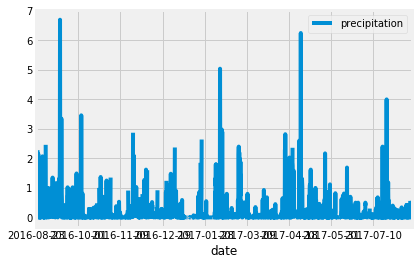

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

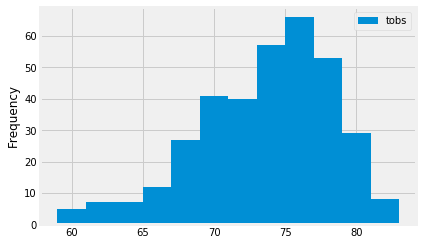

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(results)
df = pd.DataFrame(results, columns=['tobs'])
print(df)
df.plot.hist(bins=12)
plt.tight_layout

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def stats(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    if not end:
        results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
        temps = list(np.ravel(results))
        return jsonify(temps)
    results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    return jsonify(temps)

# Challenge

In [35]:
# Perform a query to retrieve the date and precipitation scores for June in all years and all stations
june_precip = []
june_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_precip)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date column
june_precip_df = pd.DataFrame(june_precip, columns=['date','precipitation'])
june_precip_df.set_index(june_precip_df['date'], inplace=True)
print(june_precip_df.to_string(index=False))

       date  precipitation
 2010-06-01           0.00
 2010-06-02           0.01
 2010-06-03           0.00
 2010-06-04           0.00
 2010-06-05           0.00
 2010-06-06           0.00
 2010-06-07           0.00
 2010-06-08           0.00
 2010-06-09           0.00
 2010-06-10           0.00
 2010-06-11           0.00
 2010-06-12           0.00
 2010-06-13           0.00
 2010-06-14           0.00
 2010-06-15           0.00
 2010-06-16           0.00
 2010-06-17           0.00
 2010-06-18           0.00
 2010-06-19           0.00
 2010-06-20           0.00
 2010-06-21           0.00
 2010-06-22           0.00
 2010-06-23           0.00
 2010-06-24           0.00
 2010-06-25           0.00
 2010-06-26           0.02
 2010-06-27           0.00
 2010-06-28           0.00
 2010-06-29           0.00
 2010-06-30           0.00
 2011-06-01           0.07
 2011-06-02           0.00
 2011-06-03           0.56
 2011-06-04           0.89
 2011-06-05           0.00
 2011-06-06           0.00
 

In [37]:
# Gather statistical analysis for precipitation in June
june_precip_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


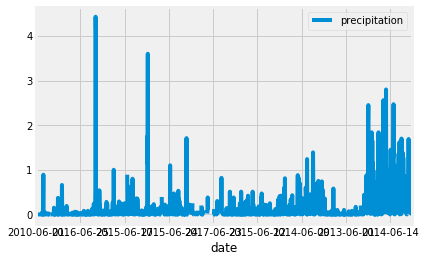

In [38]:
# Plot precipitation data for June in all years at all stations
june_precip_df.plot()

In [41]:
# Perform a query to retrieve the date and temperatures for June in all years and all stations
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_temps)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
june_temps_df = pd.DataFrame(june_temps, columns=['date','tobs'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)
print(june_temps_df.to_string(index=False))

       date  tobs
 2010-06-01  78.0
 2010-06-02  76.0
 2010-06-03  78.0
 2010-06-04  76.0
 2010-06-05  77.0
 2010-06-06  78.0
 2010-06-07  77.0
 2010-06-08  78.0
 2010-06-09  78.0
 2010-06-10  79.0
 2010-06-11  78.0
 2010-06-12  78.0
 2010-06-13  78.0
 2010-06-14  77.0
 2010-06-15  78.0
 2010-06-16  78.0
 2010-06-17  77.0
 2010-06-18  77.0
 2010-06-19  82.0
 2010-06-20  78.0
 2010-06-21  78.0
 2010-06-22  78.0
 2010-06-23  78.0
 2010-06-24  78.0
 2010-06-25  77.0
 2010-06-26  76.0
 2010-06-27  78.0
 2010-06-28  78.0
 2010-06-29  78.0
 2010-06-30  78.0
 2011-06-01  77.0
 2011-06-02  78.0
 2011-06-03  73.0
 2011-06-04  70.0
 2011-06-05  76.0
 2011-06-06  77.0
 2011-06-07  77.0
 2011-06-08  77.0
 2011-06-09  77.0
 2011-06-10  78.0
 2011-06-11  77.0
 2011-06-12  77.0
 2011-06-13  78.0
 2011-06-14  78.0
 2011-06-15  77.0
 2011-06-17  78.0
 2011-06-18  78.0
 2011-06-19  75.0
 2011-06-20  76.0
 2011-06-21  76.0
 2011-06-24  77.0
 2011-06-25  78.0
 2011-06-26  76.0
 2011-06-27  77.0
 2011-06-2

In [43]:
# Gather statistical analysis for temperatures in June for all years and all stations
june_temps_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


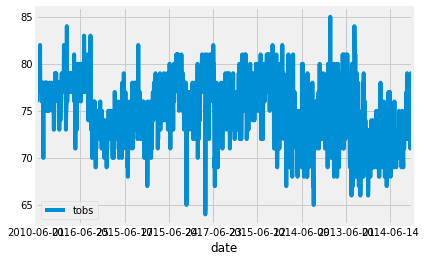

In [44]:
# Plot temp data for June to see trends
june_temps_df.plot()

In [45]:
# Perform a query to retrieve the date and precipitation scores for December in all years and all stations
dec_precip = []
dec_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(dec_precip)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dec_precip_df = pd.DataFrame(dec_precip, columns=['date','precipitation'])
dec_precip_df.set_index(dec_precip_df['date'], inplace=True)
print(dec_precip_df.to_string(index=False))

       date  precipitation
 2010-12-01           0.04
 2010-12-03           0.00
 2010-12-04           0.00
 2010-12-06           0.00
 2010-12-07           0.00
 2010-12-08           0.00
 2010-12-09           0.00
 2010-12-10           1.58
 2010-12-11           0.77
 2010-12-12           0.00
 2010-12-13           0.00
 2010-12-14           0.00
 2010-12-15           0.00
 2010-12-16           0.00
 2010-12-17           0.00
 2010-12-18           0.00
 2010-12-19           1.40
 2010-12-23           0.00
 2010-12-24           0.00
 2010-12-26            NaN
 2010-12-27           0.13
 2010-12-28           0.55
 2010-12-29           0.06
 2010-12-30           0.01
 2010-12-31           0.00
 2011-12-01           0.03
 2011-12-02           0.08
 2011-12-03           0.00
 2011-12-04           0.00
 2011-12-05           0.00
 2011-12-06           0.00
 2011-12-07           0.00
 2011-12-08           0.00
 2011-12-09           0.13
 2011-12-10           0.07
 2011-12-11           0.07
 

In [47]:
# Gather statistical analysis for precipitation in December
dec_precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


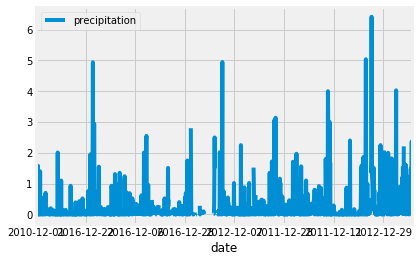

In [48]:
# Plot precipitation data for June in all years at all stations
dec_precip_df.plot()

In [49]:
# Perform a query to retrieve the date and temperatures for December in all years and all stations
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(dec_temps)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dec_temps_df = pd.DataFrame(dec_temps, columns=['date','tobs'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)
print(dec_temps_df.to_string(index=False))

       date  tobs
 2010-12-01  76.0
 2010-12-03  74.0
 2010-12-04  74.0
 2010-12-06  64.0
 2010-12-07  64.0
 2010-12-08  67.0
 2010-12-09  77.0
 2010-12-10  66.0
 2010-12-11  69.0
 2010-12-12  68.0
 2010-12-13  68.0
 2010-12-14  71.0
 2010-12-15  74.0
 2010-12-16  67.0
 2010-12-17  66.0
 2010-12-18  69.0
 2010-12-19  71.0
 2010-12-23  70.0
 2010-12-24  70.0
 2010-12-26  74.0
 2010-12-27  74.0
 2010-12-28  71.0
 2010-12-29  75.0
 2010-12-30  75.0
 2010-12-31  72.0
 2011-12-01  69.0
 2011-12-02  68.0
 2011-12-03  73.0
 2011-12-04  74.0
 2011-12-05  73.0
 2011-12-06  73.0
 2011-12-07  73.0
 2011-12-08  73.0
 2011-12-09  71.0
 2011-12-10  73.0
 2011-12-11  73.0
 2011-12-12  77.0
 2011-12-13  72.0
 2011-12-14  71.0
 2011-12-15  73.0
 2011-12-16  70.0
 2011-12-17  73.0
 2011-12-18  69.0
 2011-12-19  74.0
 2011-12-20  72.0
 2011-12-21  71.0
 2011-12-22  72.0
 2011-12-23  72.0
 2011-12-24  70.0
 2011-12-25  73.0
 2011-12-26  73.0
 2011-12-27  72.0
 2011-12-28  73.0
 2011-12-29  73.0
 2011-12-3

In [51]:
# Gather statistical analysis for temperatures in December for all years and all stations
dec_temps_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


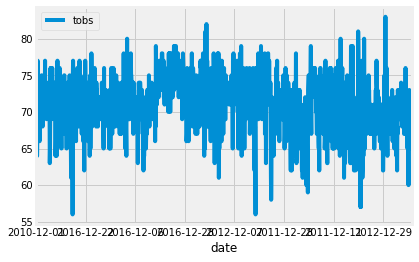

In [52]:
# Plot temp data for December to see trends
dec_temps_df.plot()